<a href="https://colab.research.google.com/github/Godwin-88/Finance/blob/master/Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning

In [1]:
# LIBRARIES WE USE IN THE NOTEBOOK
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand, seed

In [2]:
N_STATES = 2
S = np.zeros((2, 1))
P = np.zeros((2, 2))

S[0] = -1
S[1] = 1

P[0, 0] = 0.55
P[0, 1] = 1.0 - P[0, 0]
P[1, 1] = 0.55
P[1, 0] = 1.0 - P[1, 1]

# Display the state vector
print("State vector:\n", S)
# Display the transition matrix
print("Transition matrix:\n", P)
# Display the conditional mean vector
S_condmean = np.dot(P, S)
print("Conditional mean vector:\n", S_condmean)

State vector:
 [[-1.]
 [ 1.]]
Transition matrix:
 [[0.55 0.45]
 [0.45 0.55]]
Conditional mean vector:
 [[-0.1]
 [ 0.1]]


-1


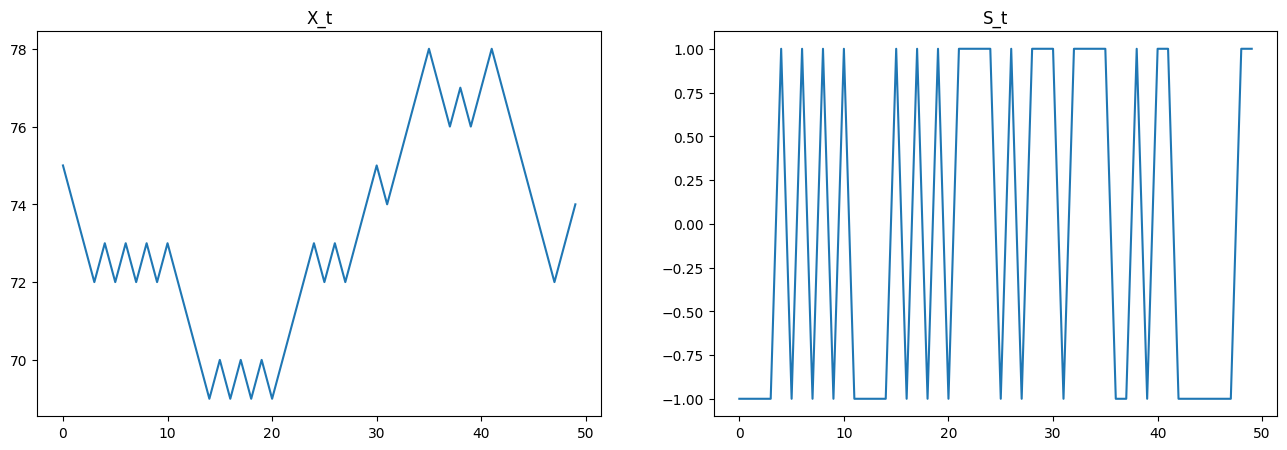

In [3]:
# SAMPLING FROM THE MARKOV CHAIN
# Simulate a sequence from the chain
# seed random number generator
np.set_printoptions(precision=3, suppress=True)
seed(12345)

LEN_HIST = 50
states = np.zeros((LEN_HIST, 2), np.int8)
Xarray = np.zeros(LEN_HIST)
Psim = np.zeros((2, 2))
S_DICT = dict(
    [
        (
            "1",
            0,
        ),
        ("2", 1),
    ]
)
S_VAL = dict(
    [
        (
            "1",
            -1,
        ),
        ("2", 1),
    ]
)

print(S_VAL["1"])

# Generate sequence of uniform random numbers
randarray = rand(LEN_HIST)
# Initialize process s_0, say at state 1 (0 in Python's vector notation)
states[0, :] = (S_DICT["1"], S_VAL["1"])
Xarray[0] = 75  # states[0]

for tt in range(1, LEN_HIST):
    if P[states[tt - 1, 0], states[tt - 1, 0]] > randarray[tt]:
        states[tt, :] = states[tt - 1, :]
    else:
        if states[tt - 1, 0] == S_DICT["1"]:
            states[tt, :] = [S_DICT["2"], S_VAL["2"]]
        else:
            states[tt, :] = [S_DICT["1"], S_VAL["1"]]
    Xarray[tt] = Xarray[tt - 1] + states[tt, 1]
    Psim[states[tt - 1, 0], states[tt, 0]] = (
        1.0 + Psim[states[tt - 1, 0], states[tt, 0]]
    )

# Plot the evolution of the X_t and s_t
plt.subplot(1, 2, 1)
plt.plot(Xarray)
plt.title("X_t")

plt.subplot(1, 2, 2)
plt.plot(states[:, 1])
plt.title("S_t")

fig = plt.gcf()
fig.set_size_inches(16, 5)
plt.show()

In [4]:
# Compute estimated transition matrix from the Monte Carlo exercise
Pest = (Psim.T / np.sum(Psim, axis=1)).T

print(Pest)

[[0.462 0.538]
 [0.565 0.435]]


In [5]:
# Compute estimated stationary distribution from the Monte Carlo exercise
Pstat = [1.0 - np.sum(states[:, 0]) / LEN_HIST, np.sum(states[:, 0]) / LEN_HIST]

print(Pstat)

# Compute the stationary distribution from the transition matrix.
# We can follow two methods:
# 1. Matrix multiplication
P2 = np.matmul(P, P)
print(P2)
P3 = np.matmul(P2, P)
print(P3)
P10 = np.linalg.matrix_power(P, 10)
print(P10)
P40 = np.linalg.matrix_power(P, 40)
print(P40)

# Sequential multiplication of a vector
p_stat = 0.5 * np.ones((2))
for t in range(1, 100):
    p_stat = np.dot(P.T, p_stat)

print(p_stat)

# Check this results with the matrix Pstat above (both methods should give the "same" results)

[np.float64(0.52), np.float64(0.48)]
[[0.505 0.495]
 [0.495 0.505]]
[[0.501 0.499]
 [0.499 0.501]]
[[0.5 0.5]
 [0.5 0.5]]
[[0.5 0.5]
 [0.5 0.5]]
[0.5 0.5]


In [6]:
# seed random number generator
seed(12345)

np.set_printoptions(precision=3, suppress=True)

P0 = np.array(
    [
        [87.06, 9.06, 0.53, 0.05, 0.11, 0.03, 0.05, 0.0, 3.11],
        [0.48, 87.23, 7.77, 0.47, 0.05, 0.06, 0.02, 0.02, 3.89],
        [0.03, 1.6, 88.58, 5.0, 0.26, 0.11, 0.02, 0.05, 4.35],
        [0, 0.09, 3.25, 86.49, 3.56, 0.43, 0.1, 0.16, 5.92],
        [0.01, 0.03, 0.11, 4.55, 77.82, 6.8, 0.55, 0.63, 9.51],
        [0.0, 0.02, 0.07, 0.15, 4.54, 74.6, 4.96, 3.34, 12.33],
        [0.0, 0.0, 0.1, 0.17, 0.55, 12.47, 43.11, 28.3, 15.31],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0],
    ]
)

# Normalize transition matrix, ignoring NR type
P = P0[:, 0 : P0.shape[1] - 1]  # noQA E203
P = (P.T / np.sum(P, axis=1)).T

# Verify where the ratings process converges given these estimates
P10 = np.linalg.matrix_power(P, 10)
print(P10)

P40 = np.linalg.matrix_power(P, 200)
print(P40)

# SAMPLING FROM THE MARKOV CHAIN
# Simulate how long it takes a firm to default starting with some current rating
RATINGS = dict(
    [
        ("AAA", 0),
        ("AA", 1),
        ("A", 2),
        ("BBB", 3),
        ("BB", 4),
        ("B", 5),
        ("CCC", 6),
        ("D", 7),
    ]
)
CURR_RATING = "CCC"

N_HISTORIES = 1000
LEN_HIST = 100
histories = np.zeros((N_HISTORIES, LEN_HIST), np.int8)
histories[:, 0] = RATINGS[CURR_RATING]
randarray = rand(N_HISTORIES, LEN_HIST)

default_time = np.zeros(N_HISTORIES)
default_sum = 0

for i in range(0, N_HISTORIES):
    for j in range(1, LEN_HIST):
        for r in RATINGS:
            if randarray[i, j] < np.cumsum(P[histories[i, j - 1], :])[RATINGS[r]]:
                histories[i, j] = RATINGS[r]
                break
        if histories[i, j] == RATINGS["D"]:
            break
    # Compute the average time to default
    if np.max(histories[i, :]) == RATINGS["D"]:
        where_default = np.where((histories[i, :] == RATINGS["D"]))
        default_time[i] = where_default[0][0]
        default_sum += 1
    else:
        default_time[i] = 0.0

print("Default time:", np.sum(default_time) / default_sum)

[[0.353 0.387 0.192 0.046 0.011 0.006 0.001 0.005]
 [0.021 0.42  0.395 0.124 0.021 0.01  0.002 0.008]
 [0.003 0.083 0.541 0.276 0.055 0.023 0.003 0.016]
 [0.001 0.019 0.182 0.515 0.156 0.07  0.01  0.047]
 [0.    0.005 0.044 0.203 0.311 0.228 0.031 0.178]
 [0.    0.002 0.012 0.054 0.154 0.302 0.045 0.432]
 [0.    0.001 0.005 0.018 0.052 0.115 0.018 0.79 ]
 [0.    0.    0.    0.    0.    0.    0.    1.   ]]
[[0.001 0.011 0.044 0.053 0.024 0.018 0.003 0.847]
 [0.001 0.01  0.04  0.047 0.022 0.016 0.002 0.862]
 [0.001 0.009 0.035 0.042 0.019 0.014 0.002 0.878]
 [0.    0.007 0.028 0.033 0.015 0.011 0.002 0.905]
 [0.    0.004 0.016 0.019 0.009 0.007 0.001 0.945]
 [0.    0.002 0.008 0.009 0.004 0.003 0.    0.973]
 [0.    0.001 0.003 0.003 0.002 0.001 0.    0.99 ]
 [0.    0.    0.    0.    0.    0.    0.    1.   ]]
Default time: 8.28688524590164


# Bond Valuation

In [7]:
# LIBRARIES WE USE IN THE NOTEBOOK
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand, seed
from scipy.stats import norm

In [8]:
RATINGS = dict(
    [
        ("AAA", 0),
        ("AA", 1),
        ("A", 2),
        ("BBB", 3),
        ("BB", 4),
        ("B", 5),
        ("CCC", 6),
        ("D", 7),
    ]
)
CURR_RATING = "BBB"
VAR_PR = 99.0
COUPON = 4.0

P0 = np.array(
    [
        [87.06, 9.06, 0.53, 0.05, 0.11, 0.03, 0.05, 0.0, 3.11],
        [0.48, 87.23, 7.77, 0.47, 0.05, 0.06, 0.02, 0.02, 3.89],
        [0.03, 1.6, 88.58, 5.0, 0.26, 0.11, 0.02, 0.05, 4.35],
        [0, 0.09, 3.25, 86.49, 3.56, 0.43, 0.1, 0.16, 5.92],
        [0.01, 0.03, 0.11, 4.55, 77.82, 6.8, 0.55, 0.63, 9.51],
        [0.0, 0.02, 0.07, 0.15, 4.54, 74.6, 4.96, 3.34, 12.33],
        [0.0, 0.0, 0.1, 0.17, 0.55, 12.47, 43.11, 28.3, 15.31],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0],
    ]
)


F = np.array(
    [
        [2.70, 3.13, 3.55, 3.84],
        [2.74, 3.17, 3.59, 3.88],
        [2.79, 3.24, 3.70, 3.99],
        [3.08, 3.50, 3.94, 4.22],
        [4.16, 4.52, 5.09, 5.45],
        [4.54, 5.27, 6.02, 6.39],
        [11.29, 11.27, 10.52, 10.14],
    ]
)
print("Forward rates matrix\n", F)

N_RATINGS = P0.shape[0]
print("Number of Ratings =", N_RATINGS)
N_YEARS = F.shape[1]
print("Number of years in the forward rates matrix =", N_YEARS)
MAT = 5
print("Bond maturity: ", MAT)

Forward rates matrix
 [[ 2.7   3.13  3.55  3.84]
 [ 2.74  3.17  3.59  3.88]
 [ 2.79  3.24  3.7   3.99]
 [ 3.08  3.5   3.94  4.22]
 [ 4.16  4.52  5.09  5.45]
 [ 4.54  5.27  6.02  6.39]
 [11.29 11.27 10.52 10.14]]
Number of Ratings = 8
Number of years in the forward rates matrix = 4
Bond maturity:  5


In [9]:
# Normalize transition matrix, ignoring NR type
P = P0[:, 0 : P0.shape[1] - 1]  # noQA E203
P = (P.T / np.sum(P, axis=1)).T

print("Transition Matrix (normalized):\n", P)

Transition Matrix (normalized):
 [[0.899 0.094 0.005 0.001 0.001 0.    0.001 0.   ]
 [0.005 0.908 0.081 0.005 0.001 0.001 0.    0.   ]
 [0.    0.017 0.926 0.052 0.003 0.001 0.    0.001]
 [0.    0.001 0.035 0.919 0.038 0.005 0.001 0.002]
 [0.    0.    0.001 0.05  0.86  0.075 0.006 0.007]
 [0.    0.    0.001 0.002 0.052 0.851 0.057 0.038]
 [0.    0.    0.001 0.002 0.006 0.147 0.509 0.334]
 [0.    0.    0.    0.    0.    0.    0.    1.   ]]


In [10]:
D_RECOVERY = 62

bond_values = np.zeros(N_RATINGS)
bond_values[N_RATINGS - 1] = D_RECOVERY
for r in range(0, N_RATINGS - 1):
    bond_values[r] = COUPON
    for t in range(0, N_YEARS):
        bond_values[r] = bond_values[r] + (COUPON + 100 * (N_YEARS - 1 == t)) / (
            1 + (F[r, t] / 100.0)
        ) ** (t + 1)

print("Bond values:\n ", bond_values)
pw_values = np.multiply(bond_values, P[RATINGS[CURR_RATING], :])
bond_val = np.sum(pw_values)
print("Bond value (one-year ahead): ", bond_val)

Bond values:
  [104.707 104.561 104.165 103.328  99.058  95.969  84.461  62.   ]
Bond value (one-year ahead):  103.07258525429066


In [11]:
# seed random number generator
seed(12345)

TARGET_PURSE = 5
INIT_PURSE = 1

N_STATES = TARGET_PURSE + 1

S = np.zeros((N_STATES, 1))
P = np.zeros((N_STATES, N_STATES))

P[0, 0] = 1.0
P[N_STATES - 1, N_STATES - 1] = 1.0

for ii in range(1, N_STATES - 1):
    for jj in range(0, N_STATES):
        if jj == ii - 1 or jj == ii + 1:
            P[ii, jj] = 0.5

print("Transition matrix:\n", P)

Transition matrix:
 [[1.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  1. ]]


In [12]:
N_HISTORIES = 100000  # number of histories or simulations
LEN_HIST = 100  # Length of each simulation
histories = np.zeros((N_HISTORIES, LEN_HIST))
histories[:, 0] = INIT_PURSE * np.ones(N_HISTORIES)
randarray = rand(N_HISTORIES, LEN_HIST)

for i in range(0, N_HISTORIES):
    for j in range(1, LEN_HIST):
        histories[i, j] = (
            histories[i, j - 1] + (randarray[i, j] >= 0.5) - (randarray[i, j] < 0.5)
        )
        if histories[i, j] == TARGET_PURSE or histories[i, j] < 1:
            histories[i, j + 1 : LEN_HIST + 1] = histories[i, j]  # noQA E203
            break

target_num = np.sum(np.max(histories, axis=1) == TARGET_PURSE)

end_gamble = np.zeros(N_HISTORIES)
end_gamble_sum = 0

for i in range(0, N_HISTORIES):
    if np.max(histories[i, :]) == TARGET_PURSE:
        where_gamble_ends_T = np.where((histories[i, :] == TARGET_PURSE))
        end_gamble[i] = where_gamble_ends_T[0][0]
        end_gamble_sum += 1
    elif np.min(histories[i, :]) < 1:
        where_gamble_ends_0 = np.where((histories[i, :] < 1))
        end_gamble[i] = where_gamble_ends_0[0][0]
        end_gamble_sum += 1
    else:
        end_gamble[i] = 0.0

broke_num = np.sum(np.min(histories, axis=1) < 1)

print(
    "Probability of getting the target:",
    target_num / N_HISTORIES,
    "\nProbability of losing all the money:",
    broke_num / N_HISTORIES,
)
print(
    "Expected time until reaching a stopping result:",
    np.sum(end_gamble) / end_gamble_sum,
    "\nTotal number of simulations:",
    end_gamble_sum,
)

Probability of getting the target: 0.1985 
Probability of losing all the money: 0.8015
Expected time until reaching a stopping result: 3.99222 
Total number of simulations: 100000


In [13]:
# Defining both methods


def tauchen_method(RHO, SIGMA, LAMBDA, N_GRID):
    start_tauchen = -LAMBDA * SIGMA / (1 - RHO**2) ** 0.5
    end_tauchen = -start_tauchen
    zgrid_tauchen = np.linspace(start_tauchen, end_tauchen, N_GRID)
    zmid_points = (zgrid_tauchen[1:] + zgrid_tauchen[:-1]) / 2
    P_tauchen = np.zeros((N_GRID, N_GRID))
    P_tauchen[:, 0] = norm.cdf((zmid_points[0] - RHO * zgrid_tauchen) / SIGMA)
    P_tauchen[:, -1] = 1.0 - norm.cdf((zmid_points[-1] - RHO * zgrid_tauchen) / SIGMA)
    for i in range(0, N_GRID):
        for j in range(1, N_GRID - 1):
            P_tauchen[i, j] = norm.cdf(
                (zmid_points[j] - RHO * zgrid_tauchen[i]) / SIGMA
            ) - norm.cdf((zmid_points[j - 1] - RHO * zgrid_tauchen[i]) / SIGMA)
    return P_tauchen, zgrid_tauchen


def rouwen_method(RHO, SIGMA, N_GRID):
    p_rouwen = (1 + RHO) * 0.5
    q_rouwen = p_rouwen
    start_rouwen = -(((N_GRID - 1) / (1 - RHO**2)) ** 0.5) * SIGMA
    end_rouwen = -start_rouwen
    zgrid_rouwen = np.linspace(start_rouwen, end_rouwen, N_GRID)
    P_rouwen = np.append(
        [[p_rouwen, 1.0 - p_rouwen]], [[1 - q_rouwen, q_rouwen]], axis=0
    )

    for i in range(2, N_GRID):
        m1 = np.append(P_rouwen, np.zeros((i, 1)), axis=1)
        m1 = np.append(m1, np.zeros((1, i + 1)), axis=0)
        m2 = np.append(np.zeros((i, 1)), P_rouwen, axis=1)
        m2 = np.append(m2, np.zeros((1, i + 1)), axis=0)
        m3 = np.append(P_rouwen, np.zeros((i, 1)), axis=1)
        m3 = np.append(np.zeros((1, i + 1)), m3, axis=0)
        m4 = np.append(np.zeros((i, 1)), P_rouwen, axis=1)
        m4 = np.append(np.zeros((1, i + 1)), m4, axis=0)

        P_rouwen = (
            p_rouwen * m1 + (1 - p_rouwen) * m2 + (1 - q_rouwen) * m3 + q_rouwen * m4
        )
        P_rouwen[1:i, :] = 0.5 * P_rouwen[1:i, :]

    return P_rouwen, zgrid_rouwen

In [14]:
# Fix the parameters
RHO = 0.975
SIGMA = 0.1
N_GRID = 9
LAMBDA = 2.0  # Used in Tauchen method

P_tauchen, zgrid_tauchen = tauchen_method(RHO, SIGMA, LAMBDA, N_GRID)
P_rouwen, zgrid_rouwen = rouwen_method(RHO, SIGMA, N_GRID)

# Find the stationary distributions by iteration
p_stat_tauchen = np.ones((N_GRID, 1)) / N_GRID
p_stat_rouwen = np.ones((N_GRID, 1)) / N_GRID
for t in range(1, 100):
    p_stat_tauchen = np.dot(P_tauchen.T, p_stat_tauchen)
    p_stat_rouwen = np.dot(P_rouwen.T, p_stat_rouwen)

# Check if unconditional moments match
tauchen_mean_stat = np.dot(p_stat_tauchen.T, zgrid_tauchen) / N_GRID
tauchen_sd_stat = (
    np.dot(p_stat_tauchen.T, (zgrid_tauchen - tauchen_mean_stat) ** 2)
) ** 0.5

rouwen_mean_stat = np.dot(p_stat_rouwen.T, zgrid_rouwen) / N_GRID
rouwen_sd_stat = (
    np.dot(p_stat_rouwen.T, (zgrid_rouwen - rouwen_mean_stat) ** 2)
) ** 0.5

print(
    "Checking the unconditional mean....",
    "Tauchen Mean:",
    tauchen_mean_stat,
    "Rouwen Mean:",
    rouwen_mean_stat,
    "Mean:",
    0,
)
print(
    "Checking the unconditional sd....",
    "Tauchen sd:",
    tauchen_sd_stat,
    "Rouwen sd:",
    rouwen_sd_stat,
    "sd:",
    SIGMA / (1 - RHO**2) ** 0.5,
)

Checking the unconditional mean.... Tauchen Mean: [-0.] Rouwen Mean: [-0.] Mean: 0
Checking the unconditional sd.... Tauchen sd: [0.457] Rouwen sd: [0.454] sd: 0.45003516037040936


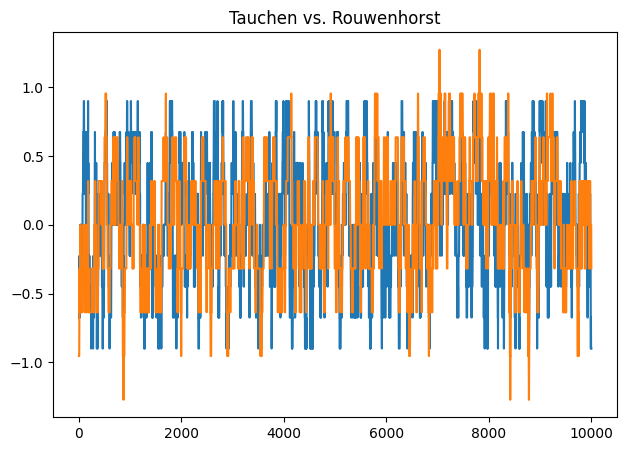

In [15]:
# Monte Carlo simulations to compare performance
# seed random number generator
seed(12345)

LEN_HIST = 10000

histories_tauchen_st = np.zeros((LEN_HIST), np.int8)
histories_tauchen_z = np.zeros((LEN_HIST))
histories_tauchen_st[0] = 1
histories_tauchen_z[0] = zgrid_tauchen[histories_tauchen_st[0]]

histories_rouwen_st = np.zeros((LEN_HIST), np.int8)
histories_rouwen_z = np.zeros((LEN_HIST))
histories_rouwen_st[0] = 1
histories_rouwen_z[0] = zgrid_rouwen[histories_rouwen_st[0]]

randarray = rand(LEN_HIST)

for j in range(1, LEN_HIST):
    for r in range(0, N_GRID):
        if randarray[j] < np.cumsum(P_tauchen[histories_tauchen_st[j - 1], :])[r]:
            histories_tauchen_z[j] = zgrid_tauchen[r]
            histories_tauchen_st[j] = r
            break
    for r in range(0, N_GRID):
        if randarray[j] < np.cumsum(P_rouwen[histories_rouwen_st[j - 1], :])[r]:
            histories_rouwen_z[j] = zgrid_rouwen[r]
            histories_rouwen_st[j] = r
            break

plt.subplot(1, 2, 1)
plt.plot(histories_tauchen_z[:])
plt.plot(histories_rouwen_z[:])
plt.title("Tauchen vs. Rouwenhorst")

fig = plt.gcf()
fig.set_size_inches(16, 5)
plt.show()

In [16]:
# Compute mean, variance, and autocorrelation coefficient of both series
# Exclude the initial periods (Burn-in)
T_EXCLUDE = 100
tauchen_mean = np.mean(histories_tauchen_z[T_EXCLUDE:LEN_HIST])
rouwen_mean = np.mean(histories_rouwen_z[T_EXCLUDE:LEN_HIST])

print("Real mean:", 0, "Tauchen mean:", tauchen_mean, "Rouwen mean:", rouwen_mean)

tauchen_sd = np.std(histories_tauchen_z[T_EXCLUDE:LEN_HIST])
rouwen_sd = np.std(histories_rouwen_z[T_EXCLUDE:LEN_HIST])

print(
    "Real sd:",
    SIGMA / (1 - RHO**2) ** 0.5,
    "Tauchen sd:",
    tauchen_sd,
    "Rouwen_sd:",
    rouwen_sd,
)

tauchen_cov = np.cov(
    histories_tauchen_z[T_EXCLUDE : LEN_HIST - 1],  # noQA E203
    histories_tauchen_z[T_EXCLUDE + 1 : LEN_HIST],  # noQA E203
)
rouwen_cov = np.cov(
    histories_rouwen_z[T_EXCLUDE : LEN_HIST - 1],  # noQA E203
    histories_rouwen_z[T_EXCLUDE + 1 : LEN_HIST],  # noQA E203
)

tauchen_rho = tauchen_cov[0, 1] / tauchen_cov[0, 0]
rouwen_rho = rouwen_cov[0, 1] / rouwen_cov[0, 0]

print("Real rho:", RHO, "Tauchen rho:", tauchen_rho, "Rouwen rho:", rouwen_rho)

Real mean: 0 Tauchen mean: 0.036139187120654066 Rouwen mean: 0.04062967301810595
Real sd: 0.45003516037040936 Tauchen sd: 0.44027305149222923 Rouwen_sd: 0.4233634186236244
Real rho: 0.975 Tauchen rho: 0.966294593991391 Rouwen rho: 0.9728902087196062
